In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import joblib
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

plt.style.use('seaborn-v0_8')

In [15]:
def generate_course_data(n_samples=1000, seed=42, version=1):
    np.random.seed(seed)

    courses = ['AI & ML', 'Data Science', 'Cybersecurity', 'Cloud Computing',
               'Business Analytics', 'Software Engineering', 'Digital Marketing',
               'Blockchain', 'IoT', 'DevOps']

    df = pd.DataFrame({
        'course_id': range(1, n_samples + 1),
        'course_name': np.random.choice(courses, n_samples),
        'semester': np.random.randint(1, 9, n_samples),
        'faculty_rating': np.round(np.random.uniform(3.0, 5.0, n_samples), 2),
        'previous_enrollment': np.random.randint(15, 150, n_samples),
        'course_difficulty': np.random.randint(1, 6, n_samples),
        'is_elective': np.random.choice([0,1], n_samples),
        'has_lab': np.random.choice([0,1], n_samples),
        'industry_demand': np.random.randint(1, 11, n_samples),
        'year': np.random.choice([2022, 2023, 2024], n_samples),
        'season': np.random.choice(['Fall','Spring','Summer'], n_samples)
    })

    df['expected_enrollment'] = (
        df['previous_enrollment'] * 0.5 +
        df['faculty_rating'] * 12 +
        df['industry_demand'] * 3 +
        df['is_elective'] * 8 -
        df['has_lab'] * 5 -
        df['course_difficulty'] * 8 +
        np.random.randint(-15, 15, n_samples)
    ).astype(int)

    df['expected_enrollment'] = df['expected_enrollment'].clip(10, 200)
    df['data_version'] = version
    df['generated_date'] = datetime.now()

    return df

df = generate_course_data()
df.head()

,course_id,course_name,semester,faculty_rating,previous_enrollment,course_difficulty,is_elective,has_lab,industry_demand,year,season,expected_enrollment,data_version,generated_date
0,1,Digital Marketing,1,4.39,63,1,0,0,9,2024,Fall,113,1,2026-02-08 06:34:59.027249
1,2,Cloud Computing,7,4.64,60,1,1,1,1,2024,Summer,85,1,2026-02-08 06:34:59.027249
2,3,Blockchain,8,3.08,127,3,1,0,10,2023,Summer,126,1,2026-02-08 06:34:59.027249
3,4,Business Analytics,4,4.34,57,2,1,1,6,2023,Spring,98,1,2026-02-08 06:34:59.027249
4,5,Digital Marketing,3,4.90,138,3,1,1,6,2023,Fall,131,1,2026-02-08 06:34:59.027249


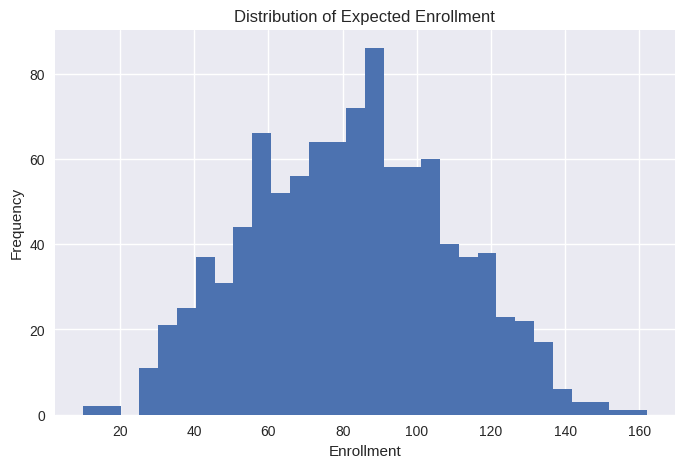

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df['expected_enrollment'], bins=30)
plt.title("Distribution of Expected Enrollment")
plt.xlabel("Enrollment")
plt.ylabel("Frequency")
plt.show()

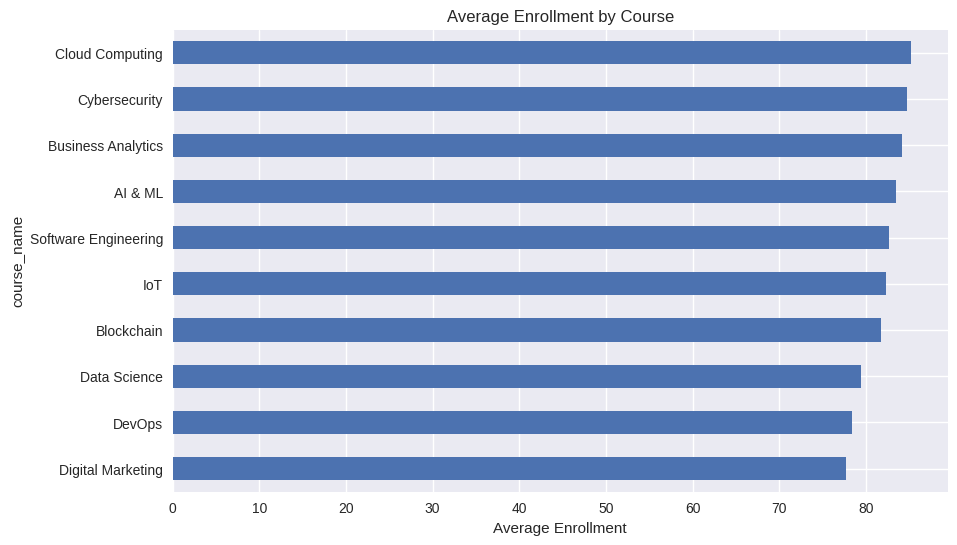

In [17]:
plt.figure(figsize=(10,6))
df.groupby('course_name')['expected_enrollment'].mean().sort_values().plot(kind='barh')
plt.title("Average Enrollment by Course")
plt.xlabel("Average Enrollment")
plt.show()

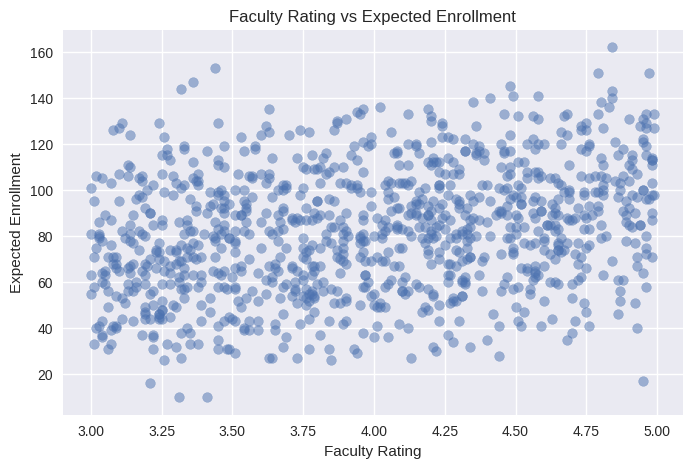

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(df['faculty_rating'], df['expected_enrollment'], alpha=0.5)
plt.title("Faculty Rating vs Expected Enrollment")
plt.xlabel("Faculty Rating")
plt.ylabel("Expected Enrollment")
plt.show()

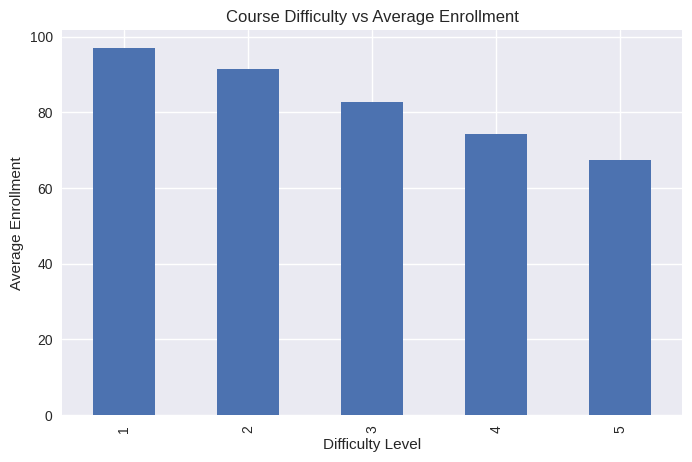

In [19]:
plt.figure(figsize=(8,5))
df.groupby('course_difficulty')['expected_enrollment'].mean().plot(kind='bar')
plt.title("Course Difficulty vs Average Enrollment")
plt.xlabel("Difficulty Level")
plt.ylabel("Average Enrollment")
plt.show()

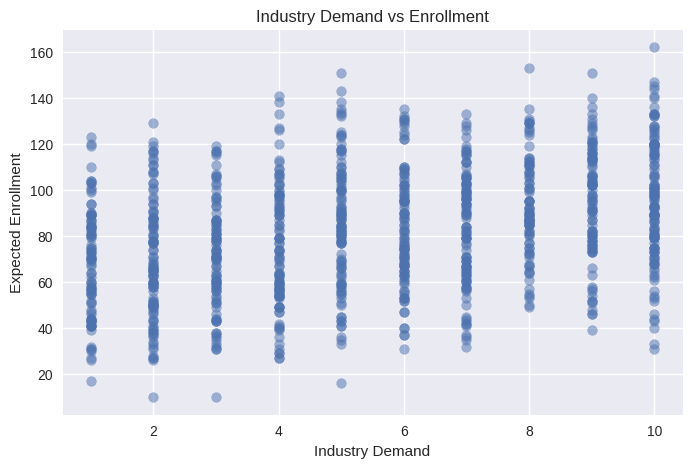

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(df['industry_demand'], df['expected_enrollment'], alpha=0.5)
plt.title("Industry Demand vs Enrollment")
plt.xlabel("Industry Demand")
plt.ylabel("Expected Enrollment")
plt.show()

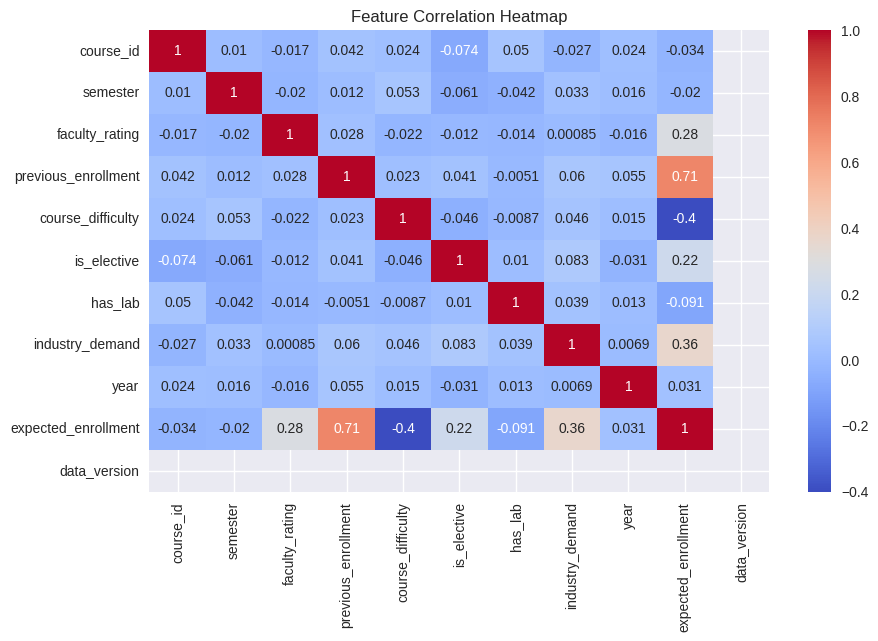

In [21]:
plt.figure(figsize=(10,6))
numeric_cols = df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

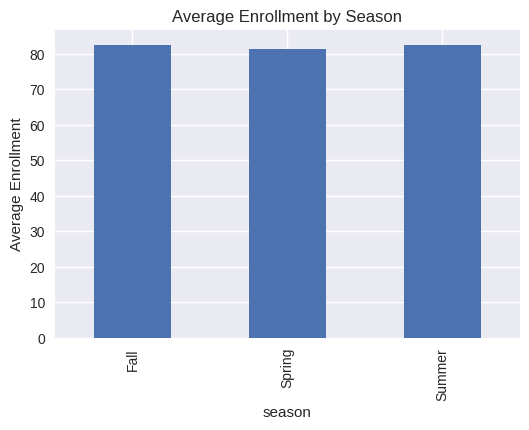

In [22]:
plt.figure(figsize=(6,4))
df.groupby('season')['expected_enrollment'].mean().plot(kind='bar')
plt.title("Average Enrollment by Season")
plt.ylabel("Average Enrollment")
plt.show()

In [23]:
X = df.drop(['course_id', 'expected_enrollment', 'generated_date', 'data_version'], axis=1)
y = df['expected_enrollment']

# Encode categorical features
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data prepared and split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

Data prepared and split into training and testing sets.
X_train shape: (800, 10)
X_test shape: (200, 10)


### Model Training and Evaluation

In [24]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({'Model': name, 'R2': r2, 'MAE': mae, 'RMSE': rmse})

results_df = pd.DataFrame(results)
print("Model training and evaluation complete.")
display(results_df)

Model training and evaluation complete.


,Model,R2,MAE,RMSE
0,Linear Regression,0.892405,7.915526,9.075735
1,Decision Tree,0.681181,12.570000,15.622740
2,Random Forest,0.814454,9.788850,11.918210


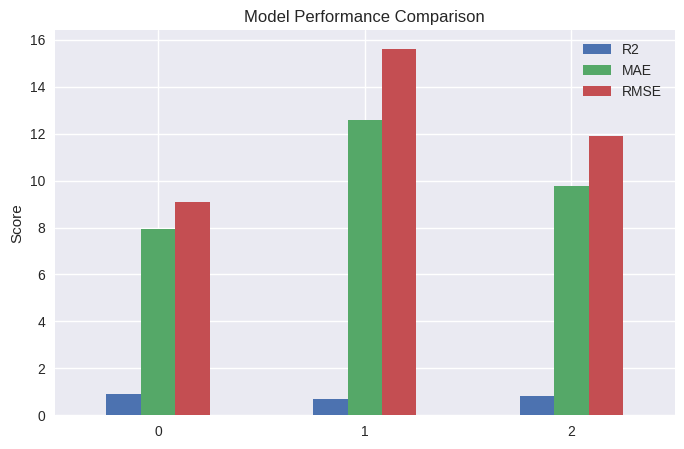

In [25]:
results_df[['R2','MAE','RMSE']].plot(kind='bar', figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()